<a href="https://colab.research.google.com/github/pattichis/AI4All-Med/blob/main/Session_3_3_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions

# Goals

1. Visualize different activation functions.
2. Discuss how inputs can get ignored.
3. Discuss the uses of the different activation functions.

# Visualize and discuss applications of popular activation functions

Review the plots and discuss the following:
1. Sigmoids are used to model probabilities. Discuss.
2. ReLU functions are not used to model probabilities. Can you see why not? Discuss.
3. Tanh can be seen to weigh positive and negative responses similarly. Can you see why?
4. Sigmoids and tanh functions can be used to model bounded functions. Discuss.
4. ReLU functions are often used when trying to generate estimates of positive real numbers. Can you see why? Discuss.

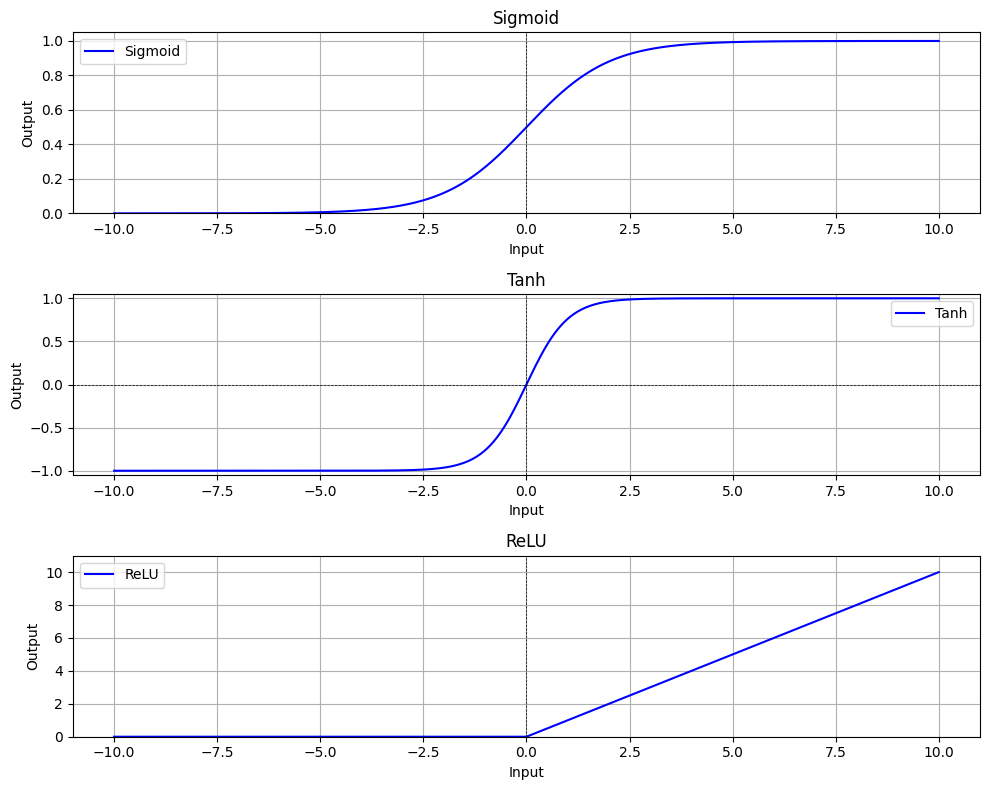

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Input range
x = torch.linspace(-10, 10, 1000)

# Activation functions and their output ranges
def sigmoid(x): return torch.sigmoid(x)
def tanh(x): return torch.tanh(x)
def relu(x): return F.relu(x)

activations = {
    "Sigmoid": (sigmoid, (0, 1.05)),      # Output is in (0, 1)
    "Tanh": (tanh, (-1.05, 1.05)),         # Output is in (-1, 1)
    "ReLU": (relu, (0, max(0, x.max().item()) + 1))  # Output is 0 to max(x)
}

# Plot each function in its own subplot with proper y-limits
plt.figure(figsize=(10, 8))

for i, (name, (func, y_range)) in enumerate(activations.items(), 1):
    plt.subplot(3, 1, i)
    y = func(x)
    plt.plot(x, y, label=name, color='blue')
    plt.title(name)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5, linestyle='--')
    plt.axvline(0, color='black', lw=0.5, linestyle='--')
    plt.ylim(*y_range)
    plt.legend()

plt.tight_layout()
plt.show()


# Visualize and discuss the differences among activation functions

Study the graphs and answer:
1. Which activations remain bounded? Which ones do not?


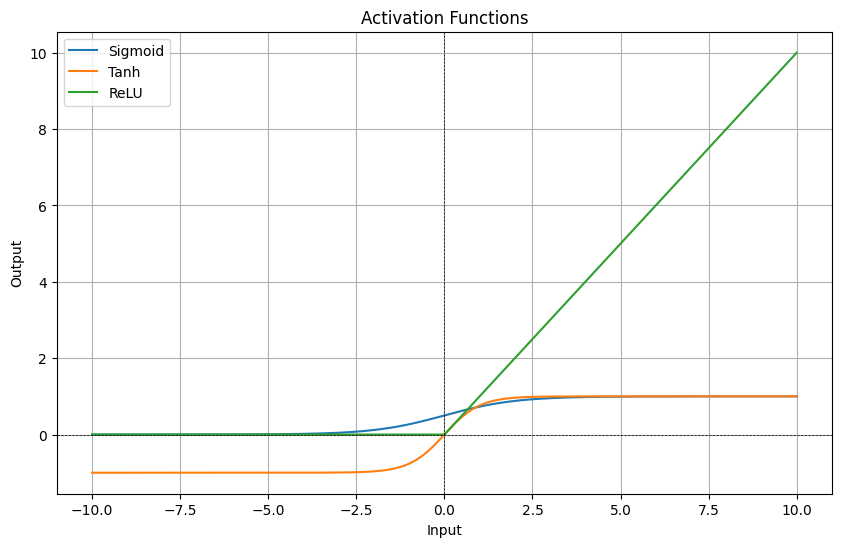

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Input values
x = torch.linspace(-10, 10, 1000)

# Activation functions
activations = {
    "Sigmoid": torch.sigmoid(x),
    "Tanh": torch.tanh(x),
    "ReLU": F.relu(x)
}

# Plot all on the same graph
plt.figure(figsize=(10, 6))
for name, y in activations.items():
    plt.plot(x, y, label=name)

# Formatting
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()
plt.show()


# Visualize the evolution

1. Which function remains below for large negative values?
2. Which one rises above all others for large positive values?
3. What is the order of the functions at the origin?


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Use fewer points for faster rendering
x = torch.linspace(-10, 10, 200)

# Activation functions
activations = {
    "Sigmoid": torch.sigmoid,
    "Tanh": torch.tanh,
    "ReLU": F.relu
}

# Setup plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-10, 10)
ax.set_ylim(-1.5, 10)
ax.set_title("Activation Function Response")
ax.set_xlabel("Input")
ax.set_ylabel("Output")
ax.grid(True)
ax.legend()

# Initialize lines
lines = {name: ax.plot([], [], label=name)[0] for name in activations}
ax.legend()

# Animation function
def animate(i):
    xi = x[:i+1]
    for name, func in activations.items():
        yi = func(xi)
        lines[name].set_data(xi, yi)
    return lines.values()

# Create animation (reduce frame count)
ani = animation.FuncAnimation(fig, animate, frames=len(x), interval=30, blit=True)

# Display inline (Jupyter/Colab)
from IPython.display import HTML
HTML(ani.to_jshtml())  # This is safe now with reduced frames


# ReLU and Bias

Study the graphs and answer:
1. What is the effect of a positive bias?
2. What is the effect of a negative bias?

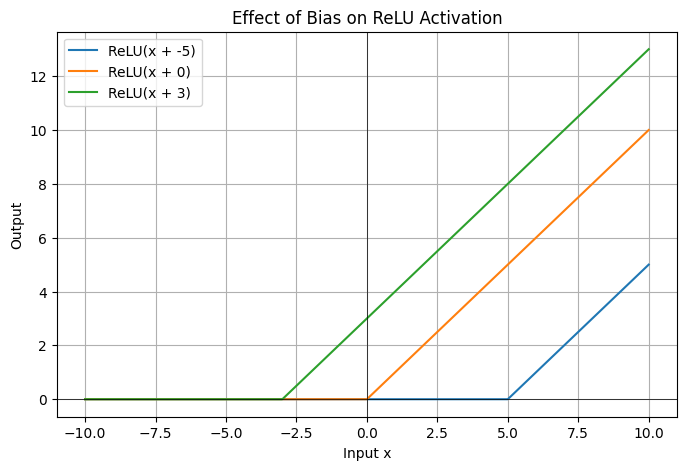

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Input range
x = torch.linspace(-10, 10, 1000)

# Bias values to demonstrate shifting
biases = [-5, 0, 3]

# Plot ReLU(x + bias)
plt.figure(figsize=(8, 5))
for b in biases:
    y = F.relu(x + b)
    plt.plot(x, y, label=f"ReLU(x + {b})")

# Formatting
plt.title("Effect of Bias on ReLU Activation")
plt.xlabel("Input x")
plt.ylabel("Output")
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.show()


# Use linear scaling and bias to train for any output range

Study the code below to see how the scale and bias moves the output curve.<br>
Answer the following:
1. How does the bias affect the range?
2. How does the scale affect the range?

Suppose that we want to use scaling for a self driving car. In this case, we want to scale the angle output to be between 0 and 45 degrees. How would you use the scale to achieve this? Do you need to change the bias? Explain.

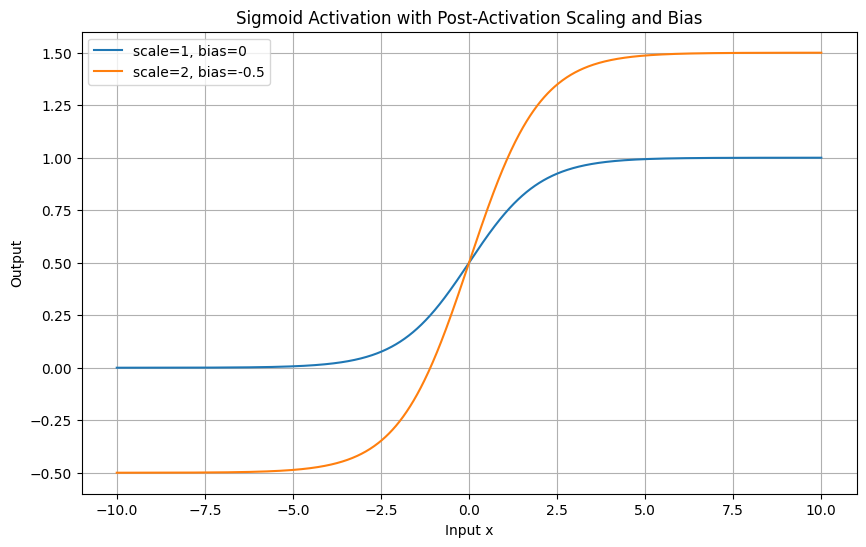

In [ ]:
import torch
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

x = torch.linspace(-10, 10, 1000)

# Parameters for scaling and bias applied after activation
params = [
    {"scale": 1, "bias": 0},
    {"scale": 2, "bias": -0.5}
]

plt.figure(figsize=(10, 6))

for p in params:
    y = sigmoid(x)
    y = p["scale"] * y + p["bias"]
    label = f"scale={p['scale']}, bias={p['bias']}"
    plt.plot(x.numpy(), y.numpy(), label=label)

plt.title("Sigmoid Activation with Post-Activation Scaling and Bias")
plt.xlabel("Input x")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()
